In [491]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "student-attitude-and-behavior"

# **Import**

In [492]:
library(ggplot2)
library(dplyr)
library(psych)
library(ggcorrplot)
library(gridExtra)

# **1. Data Import & Structure**

In [493]:
data <- read_csv('/kaggle/input/student-attitude-and-behavior/Student Attitude and Behavior.csv', show_col_types = FALSE)

* **Certification Course: Indicates whether the student has completed any certification course or not. ✅**
* **Gender: The gender of the student. 🚻**
* **Department: The department or field of study the student is enrolled in. 📚**
* **Height (CM): The height of the student in centimeters. 📏**
* **Weight (KG): The weight of the student in kilograms. ⚖️**
* **10th Mark: The student's marks obtained in the 10th grade. 📝**
* **12th Mark: The student's marks obtained in the 12th grade. 🎓**
* **College Mark: The student's marks obtained in their college or university. 🏫**
* **Hobbies: The hobbies or interests of the student. 🎨**
* **Daily Studying Time: The amount of time the student spends studying on a daily basis. ⏰**
* **Prefer to Study in: The preferred study environment or location of the student. 📚🌳**
* **Salary Expectation: The student's expectation for their future salary. 💰**
* **Do you like your degree?: The student's opinion on whether they like their degree or not. 👍👎**
* **Willingness to pursue a career based on their degree: The student's willingness to pursue a career related to their degree. 🏢**
* **Social Media & Video: The student's engagement with social media and video platforms. 📱📺**
* **Traveling Time: The time it takes for the student to commute or travel to their educational institution. 🚗**
* **Stress Level: The perceived stress level of the student. 😓**
* **Financial Status: The financial status or economic background of the student. 💵**
* **Part-time Job: Whether the student is engaged in a part-time job or not. 💼**
* **Feel free to utilize this dataset for analysis and research purposes! 📈🔍**

In [494]:
str(data)

spc_tbl_ [235 × 19] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Certification Course                                : chr [1:235] "No" "No" "Yes" "Yes" ...
 $ Gender                                              : chr [1:235] "Male" "Female" "Male" "Female" ...
 $ Department                                          : chr [1:235] "BCA" "BCA" "BCA" "BCA" ...
 $ Height(CM)                                          : num [1:235] 100 90 159 147 170 139 165 152 190 150 ...
 $ Weight(KG)                                          : num [1:235] 58 40 78 20 54 33 50 43 85 84 ...
 $ 10th Mark                                           : num [1:235] 79 70 71 70 40 90 70 61.6 88.2 60 ...
 $ 12th Mark                                           : num [1:235] 64 80 61 59 65 ...
 $ college mark                                        : num [1:235] 80 70 55 58 30 70 3 75 60 70 ...
 $ hobbies                                             : chr [1:235] "Video Games" "Cinema" "Cinema" "Reading books" ...
 $ daily s

In [495]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Certification Course*,1,235,1.646809,4.789818e-01,2,1.682540,0.0000,1.0,2,1.0,-0.61039398,-1.6343195,3.124533e-02
Gender*,2,235,1.663830,4.734062e-01,2,1.703704,0.0000,1.0,2,1.0,-0.68918668,-1.5314844,3.088162e-02
Department*,3,235,3.008511,7.952395e-01,3,3.089947,0.0000,1.0,4,3.0,-0.77656698,0.5224684,5.187571e-02
Height(CM),4,235,157.402128,2.151081e+01,160,160.423280,14.8260,4.5,192,187.5,-2.54659728,11.5998602,1.403210e+00
Weight(KG),5,235,60.803830,1.489584e+01,60,60.353968,14.8260,20.0,106,86.0,0.24582814,-0.3912485,9.716978e-01
10th Mark,6,235,76.848511,1.304756e+01,80,77.997884,13.3434,7.4,98,90.6,-1.13552564,2.5127089,8.511290e-01
12th Mark,7,235,68.775872,1.101819e+01,69,68.723968,13.3434,45.0,94,49.0,0.06835111,-0.6714405,7.187476e-01
college mark,8,235,70.660553,1.572745e+01,70,72.094868,14.8260,1.0,100,99.0,-1.60895790,4.7822334,1.025945e+00
hobbies*,9,235,2.336170,1.094748e+00,3,2.296296,1.4826,1.0,4,3.0,0.01051770,-1.3957987,7.141346e-02


In [496]:
summary(data)

 Certification Course    Gender           Department          Height(CM)   
 Length:235           Length:235         Length:235         Min.   :  4.5  
 Class :character     Class :character   Class :character   1st Qu.:152.0  
 Mode  :character     Mode  :character   Mode  :character   Median :160.0  
                                                            Mean   :157.4  
                                                            3rd Qu.:170.0  
                                                            Max.   :192.0  
   Weight(KG)      10th Mark       12th Mark      college mark   
 Min.   : 20.0   Min.   : 7.40   Min.   :45.00   Min.   :  1.00  
 1st Qu.: 50.0   1st Qu.:70.00   1st Qu.:60.00   1st Qu.: 60.00  
 Median : 60.0   Median :80.00   Median :69.00   Median : 70.00  
 Mean   : 60.8   Mean   :76.85   Mean   :68.78   Mean   : 70.66  
 3rd Qu.: 70.0   3rd Qu.:86.25   3rd Qu.:76.00   3rd Qu.: 80.00  
 Max.   :106.0   Max.   :98.00   Max.   :94.00   Max.   :100.00  
   hob

**Check missing value**

In [497]:
colSums(is.na(data))

Certification Course 
                                                   0 
                                              Gender 
                                                   0 
                                          Department 
                                                   0 
                                          Height(CM) 
                                                   0 
                                          Weight(KG) 
                                                   0 
                                           10th Mark 
                                                   0 
                                           12th Mark 
                                                   0 
                                        college mark 
                                                   0 
                                             hobbies 
                                                   0 
                                  daily studing time 
                                                   0 
                                  prefer to study in 
                                                   0 
                                  salary expectation 
                                                   0 
                            Do you like your degree? 
                                                   0 
willingness to pursue a career based on their degree 
                                                   0 
                                social medai & video 
                                                   0 
                                     Travelling Time 
                                                   0 
                                        Stress Level 
                                                   0 
                                    Financial Status 
                                                   0 
                                       part-time job 
                                                   0

**duplicate check**

In [498]:
table(duplicated(data))


FALSE 
  235 

# **2. Data Transform**

In [499]:
names(data) <- c('Certification','Gender','Department','Height','Weight','Mark_10th','Mark_12th','College_mark',
                 'Hobbies', 'Daily_studing_time', 'Study_time_prefer', 'Salary_expectation', 'Prefer_degree',
                 'Willingness_find_job', 'Social_media_usage_time', 'Travelling_time',
                 'Stress_Level', 'Financial_Status', 'Part_time_job_prefer')

In [500]:
data$Daily_studing_time <- ifelse(data$Daily_studing_time == '0 - 30 minute', '0 - 30',
                                 ifelse(data$Daily_studing_time == '30 - 60 minute', '30 - 60',
                                       ifelse(data$Daily_studing_time == '1 - 2 Hour', '60 - 120',
                                             ifelse(data$Daily_studing_time == '2 - 3 hour', '120 - 180',
                                                   ifelse(data$Daily_studing_time == '3 - 4 hour', '180 - 240','240+')))))

In [501]:
data$Social_media_usage_time <- ifelse(data$Social_media_usage_time == '30 - 60 Minute','30 - 60',
                                      ifelse(data$Social_media_usage_time == '1 - 1.30 hour','60 - 90',
                                            ifelse(data$Social_media_usage_time == '1.30 - 2 hour','90 - 120', '120+')))

In [502]:
data$Travelling_time <- ifelse(data$Travelling_time == '0 - 30 minutes','0 - 30',
                                      ifelse(data$Travelling_time == '30 - 60 minutes','30 - 60',
                                            ifelse(data$Travelling_time == '1 - 1.30 hour','60 - 90', 
                                                  ifelse(data$Travelling_time == '1.30 - 2 hour','90 - 120',
                                                        ifelse(data$Travelling_time == '2 - 2.30 hour','120 - 150',
                                                              ifelse(data$Travelling_time == '2.30 - 3 hour','150 - 180','180+'))))))

**Data Check**

In [503]:
head(data)

Certification,Gender,Department,Height,Weight,Mark_10th,Mark_12th,College_mark,Hobbies,Daily_studing_time,Study_time_prefer,Salary_expectation,Prefer_degree,Willingness_find_job,Social_media_usage_time,Travelling_time,Stress_Level,Financial_Status,Part_time_job_prefer
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
No,Male,BCA,100,58,79,64,80,Video Games,0 - 30,Morning,40000,No,50%,90 - 120,30 - 60,Bad,Bad,No
No,Female,BCA,90,40,70,80,70,Cinema,30 - 60,Morning,15000,Yes,75%,60 - 90,0 - 30,Bad,Bad,No
Yes,Male,BCA,159,78,71,61,55,Cinema,60 - 120,Anytime,13000,Yes,50%,120+,30 - 60,Awful,Bad,No
Yes,Female,BCA,147,20,70,59,58,Reading books,60 - 120,Anytime,1500000,No,50%,90 - 120,0 - 30,Bad,good,No
No,Male,BCA,170,54,40,65,30,Video Games,30 - 60,Morning,50000,Yes,25%,90 - 120,30 - 60,Good,good,No
Yes,Female,BCA,139,33,90,75,70,Cinema,30 - 60,Night,20000,Yes,50%,30 - 60,0 - 30,Bad,good,No


# **3. Data Visualization**

In [504]:
num_cols <- c('Height','Weight','Mark_10th','Mark_12th','College_mark','Salary_expectation')
cat_cols <- c('Certification','Gender','Department','Hobbies','Daily_studing_time','Study_time_prefer','Prefer_degree','Willingness_find_job',
              'Social_media_usage_time','Travelling_time','Stress_Level','Financial_Status','Part-time_job_prefer')

**Histogram**

In [505]:
p1 <- ggplot(data) + geom_histogram(aes(x=Height), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('Height Histogram') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p2 <- ggplot(data) + geom_histogram(aes(x=Weight), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('Weight Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p3 <- ggplot(data) + geom_histogram(aes(x=Mark_10th), bins = 30, col = 'white') +
            theme_bw() + ggtitle('Mark_10th Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p4 <- ggplot(data) + geom_histogram(aes(x=Mark_12th), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('Mark_12th Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p5 <- ggplot(data) + geom_histogram(aes(x=College_mark), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('College_mark Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p6 <- ggplot(data) + geom_histogram(aes(x=Salary_expectation), bins = 30, col = 'white') + 
            theme_bw() + ggtitle('Salary_expectation Histogram') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

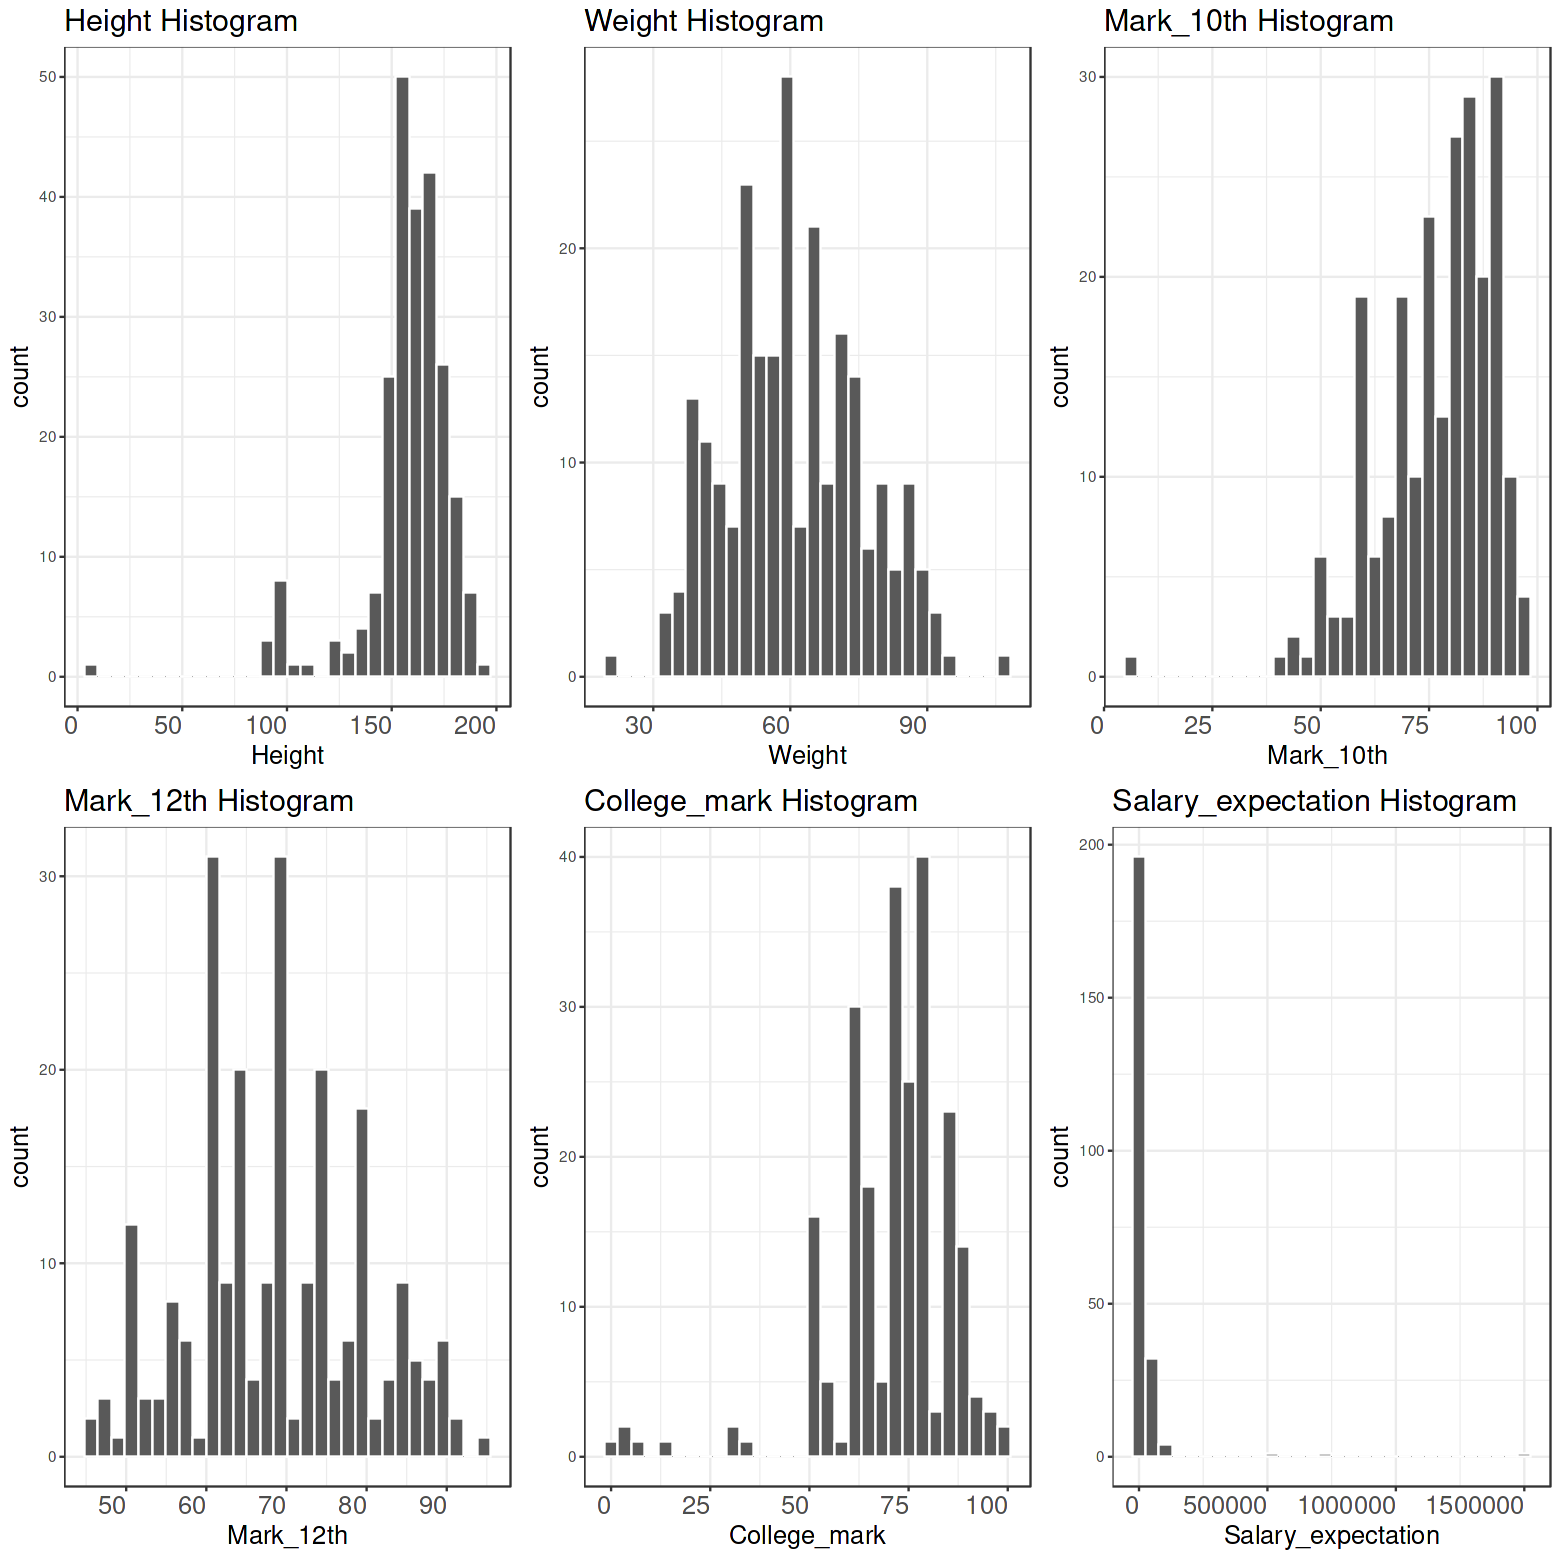

In [506]:
grid.arrange(p1,p2,p3,p4,p5,p6 ,ncol = 3)

**Boxplot**

In [507]:
p1 <- ggplot(data) + geom_boxplot(aes(x=Height)) + 
            theme_bw() + ggtitle('Height BoxplotBoxplot') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p2 <- ggplot(data) + geom_boxplot(aes(x=Weight)) + 
            theme_bw() + ggtitle('Weight Boxplot') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p3 <- ggplot(data) + geom_boxplot(aes(x=Mark_10th)) +
            theme_bw() + ggtitle('Mark_10th Boxplot') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p4 <- ggplot(data) + geom_boxplot(aes(x=Mark_12th)) + 
            theme_bw() + ggtitle('Mark_12th Boxplot') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p5 <- ggplot(data) + geom_boxplot(aes(x=College_mark)) + 
            theme_bw() + ggtitle('College_mark Boxplot') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
p6 <- ggplot(data) + geom_boxplot(aes(x=Salary_expectation)) + 
            theme_bw() + ggtitle('Salary_expectation Boxplot') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

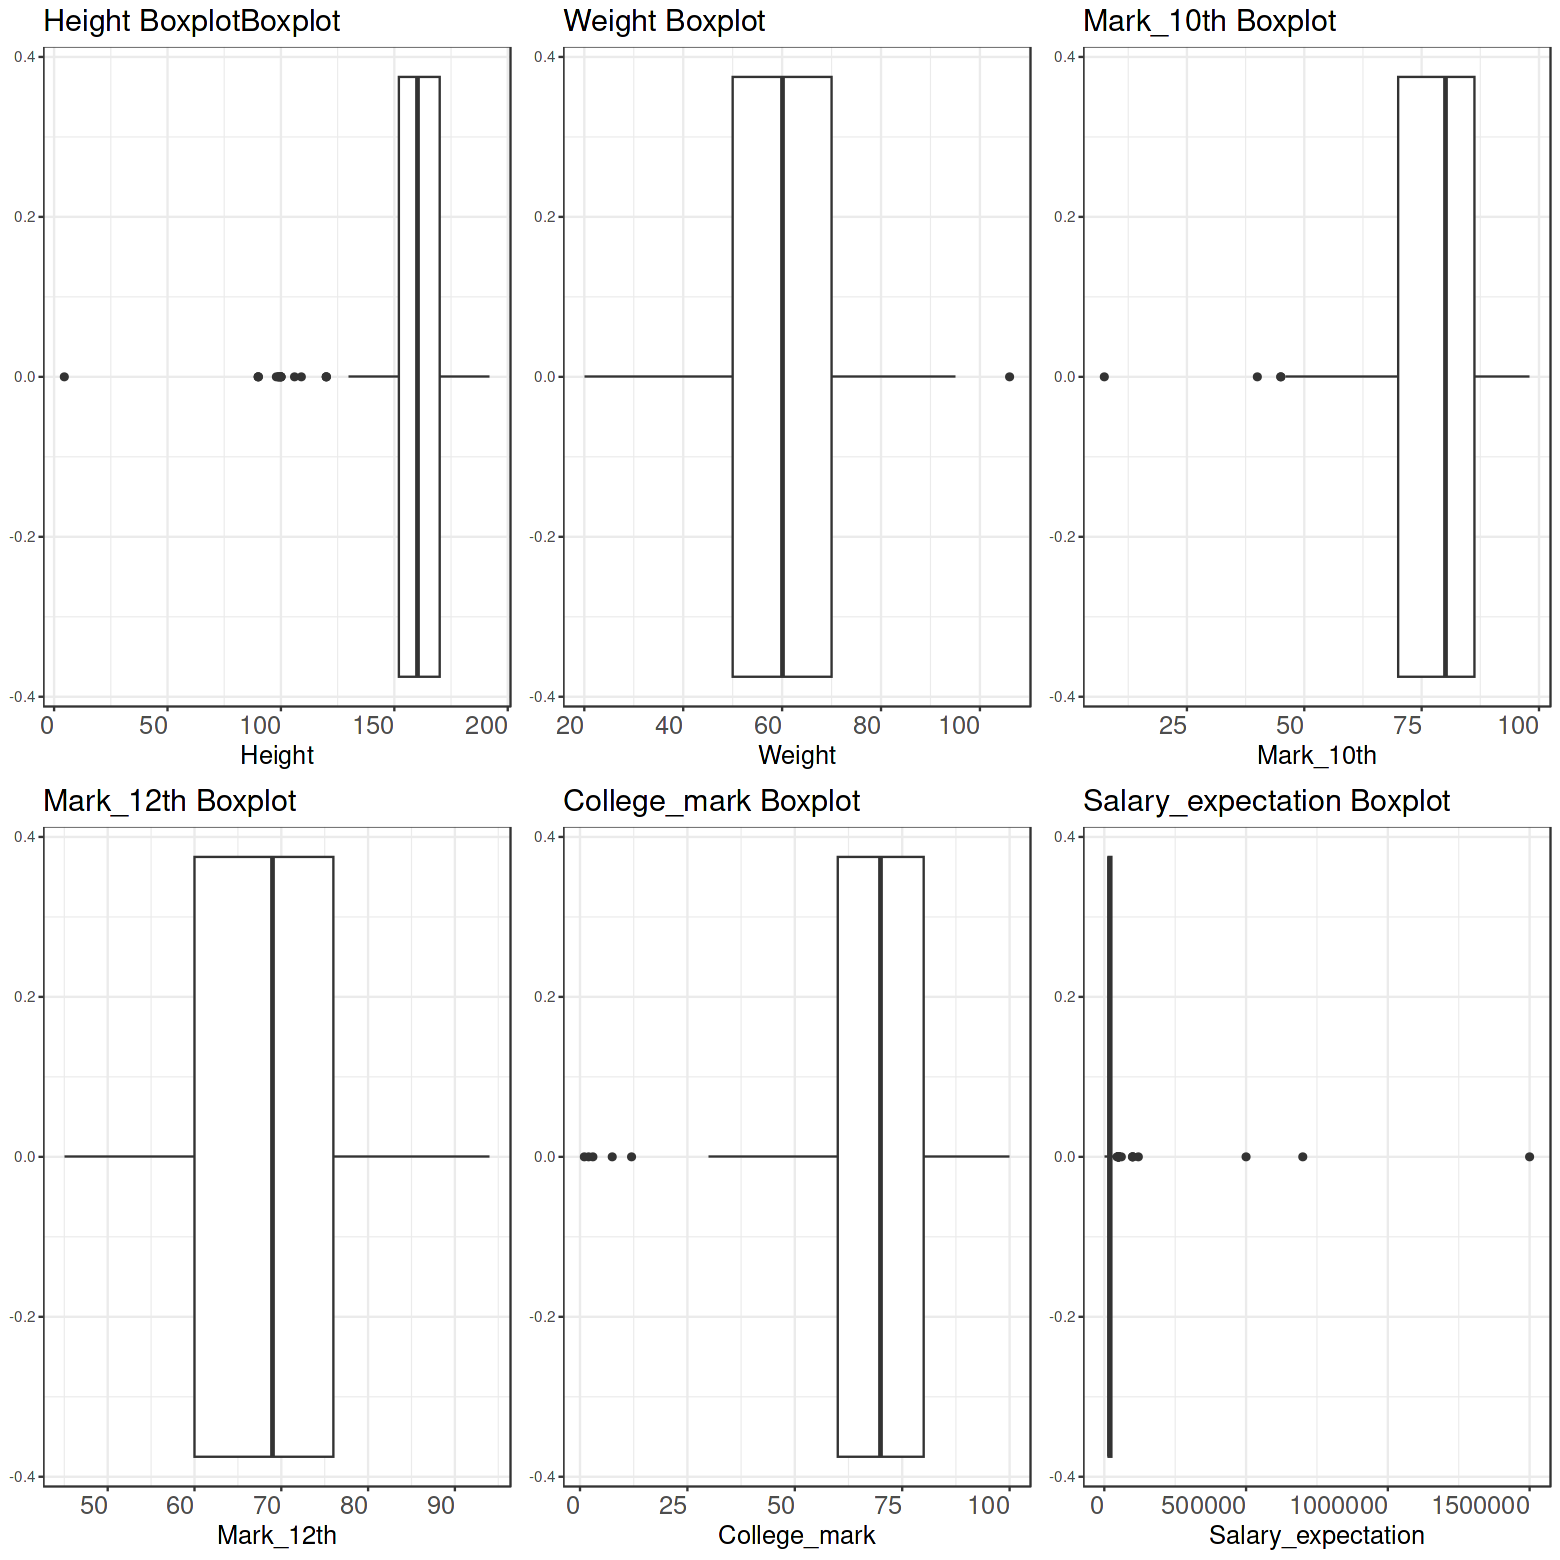

In [508]:
grid.arrange(p1,p2,p3,p4,p5,p6 ,ncol = 3)

---------

**Count Plot**

In [509]:
p1 <- ggplot(data) + geom_bar(aes(x=Certification, fill = Certification))+
            theme_bw() + ggtitle('Certification Count') + 
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
                              
p2 <- ggplot(data) + geom_bar(aes(x=Gender, fill = Gender)) + 
            theme_bw() + ggtitle('Gender Count ') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
                              
p3 <- ggplot(data) + geom_bar(aes(x=Department, fill = Department)) +
            theme_bw() + ggtitle('Department Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
p4 <- ggplot(data) + geom_bar(aes(x=Hobbies, fill = Hobbies)) + 
            theme_bw() + ggtitle('Hobbies Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
p5 <- ggplot(data) + geom_bar(aes(x=Daily_studing_time, fill = Daily_studing_time)) + 
            theme_bw() + ggtitle('Daily_studing_time Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
p6 <- ggplot(data) + geom_bar(aes(x=Study_time_prefer, fill = Study_time_prefer)) + 
            theme_bw() + ggtitle('Study_time_prefer Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
p7 <- ggplot(data) + geom_bar(aes(x=Prefer_degree, fill = Prefer_degree)) + 
            theme_bw() + ggtitle('Prefer_degree Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )
p8 <- ggplot(data) + geom_bar(aes(x=Willingness_find_job, fill = Willingness_find_job)) + 
            theme_bw() + ggtitle('Willingness_find_job Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )


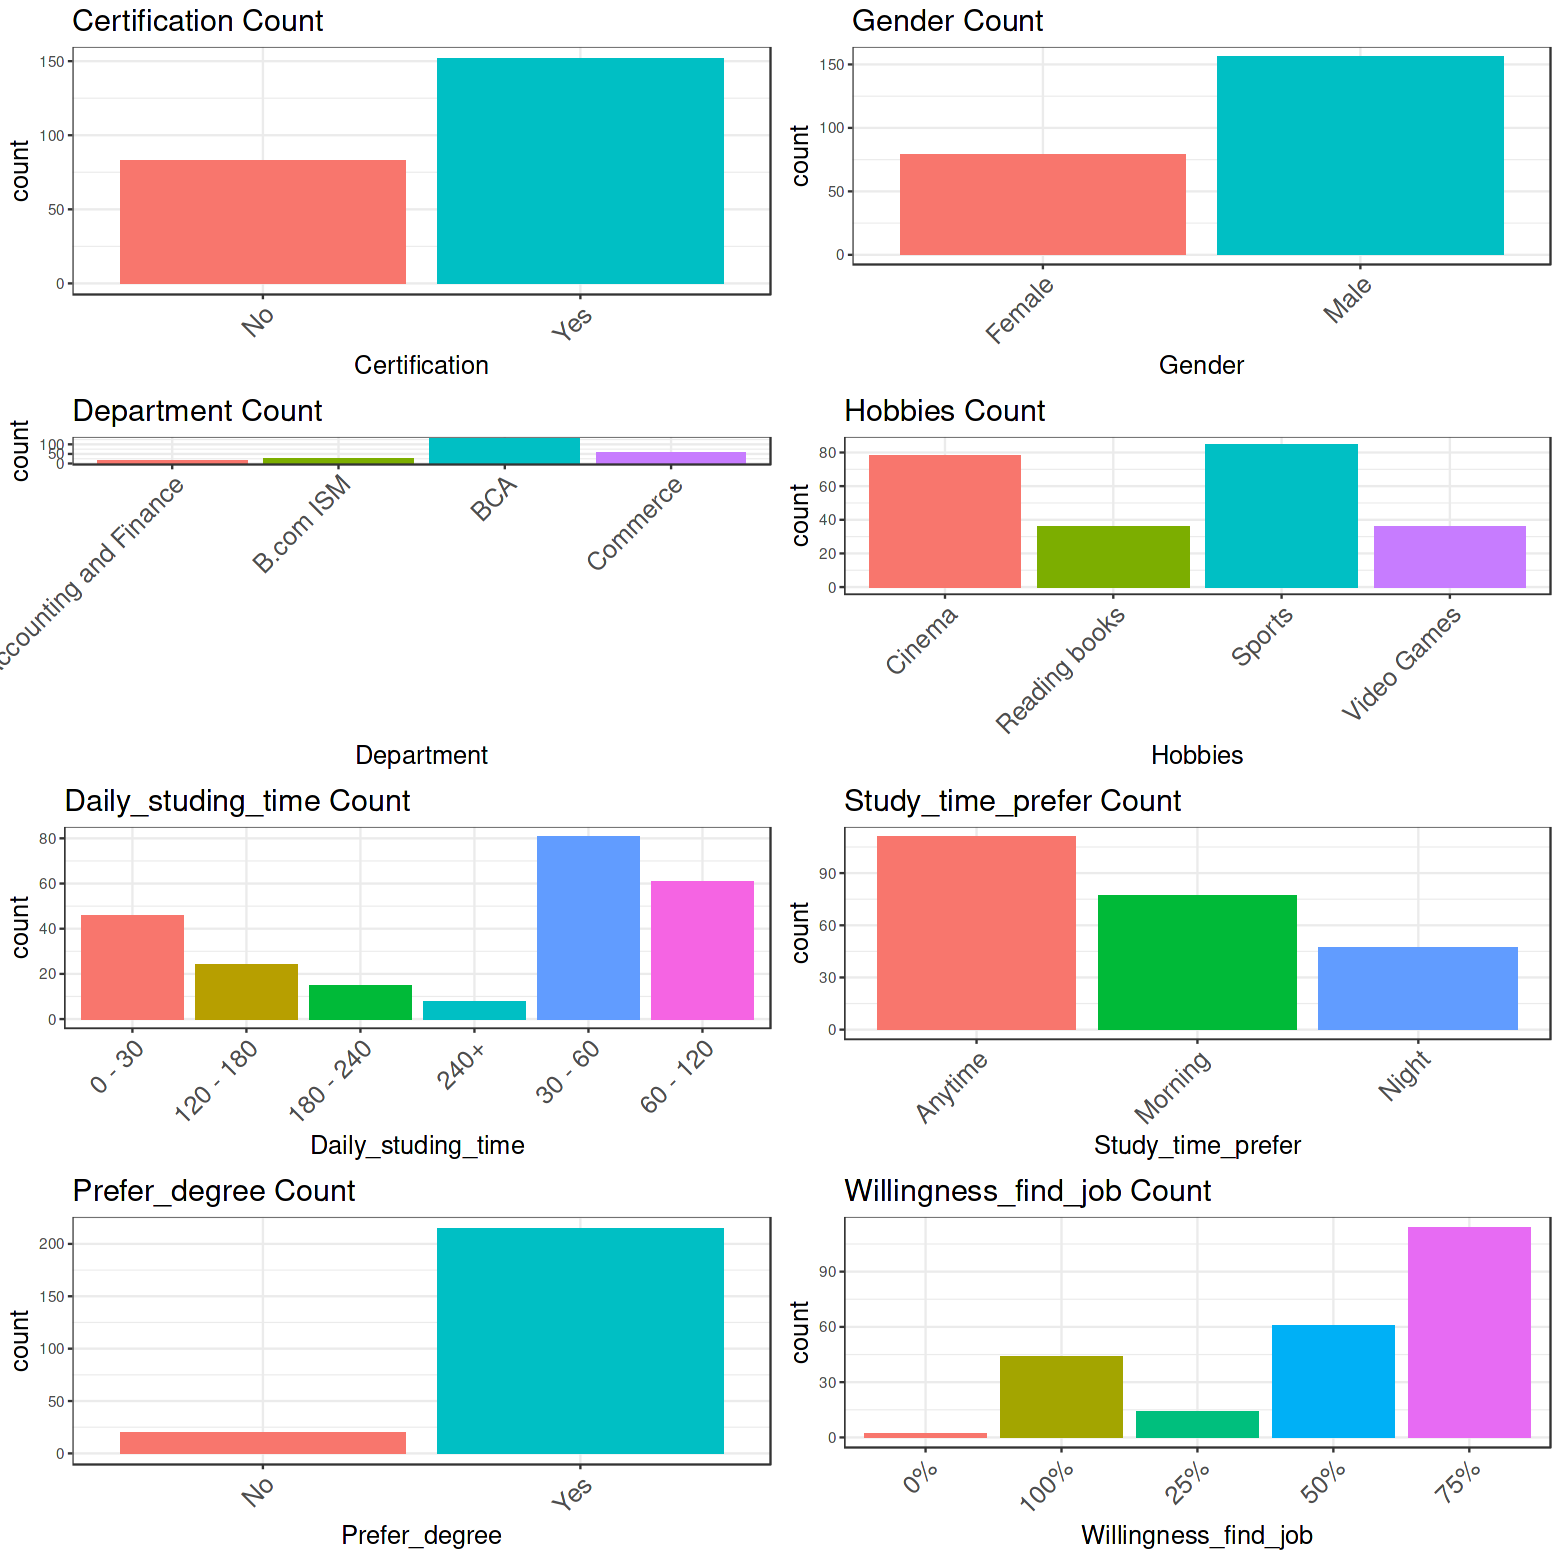

In [510]:
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8 ,ncol = 2)

In [511]:
p1 <- ggplot(data) + geom_bar(aes(x=Social_media_usage_time, fill = Social_media_usage_time)) + 
            theme_bw() + ggtitle('Social_media_usage_time Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )

p2 <- ggplot(data) + geom_bar(aes(x=Travelling_time, fill = Travelling_time)) + 
            theme_bw() + ggtitle('Travelling_time Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )

p3 <- ggplot(data) + geom_bar(aes(x=Stress_Level, fill = Stress_Level)) + 
            theme_bw() + ggtitle('Stress_Level Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )

p4 <- ggplot(data) + geom_bar(aes(x=Financial_Status, fill = Financial_Status)) + 
            theme_bw() + ggtitle('Financial_Status Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )

p5 <- ggplot(data) + geom_bar(aes(x=Part_time_job_prefer, fill = Part_time_job_prefer)) + 
            theme_bw() + ggtitle('Part-time_job_prefer Count') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=15),
            legend.position = 'none'
            )

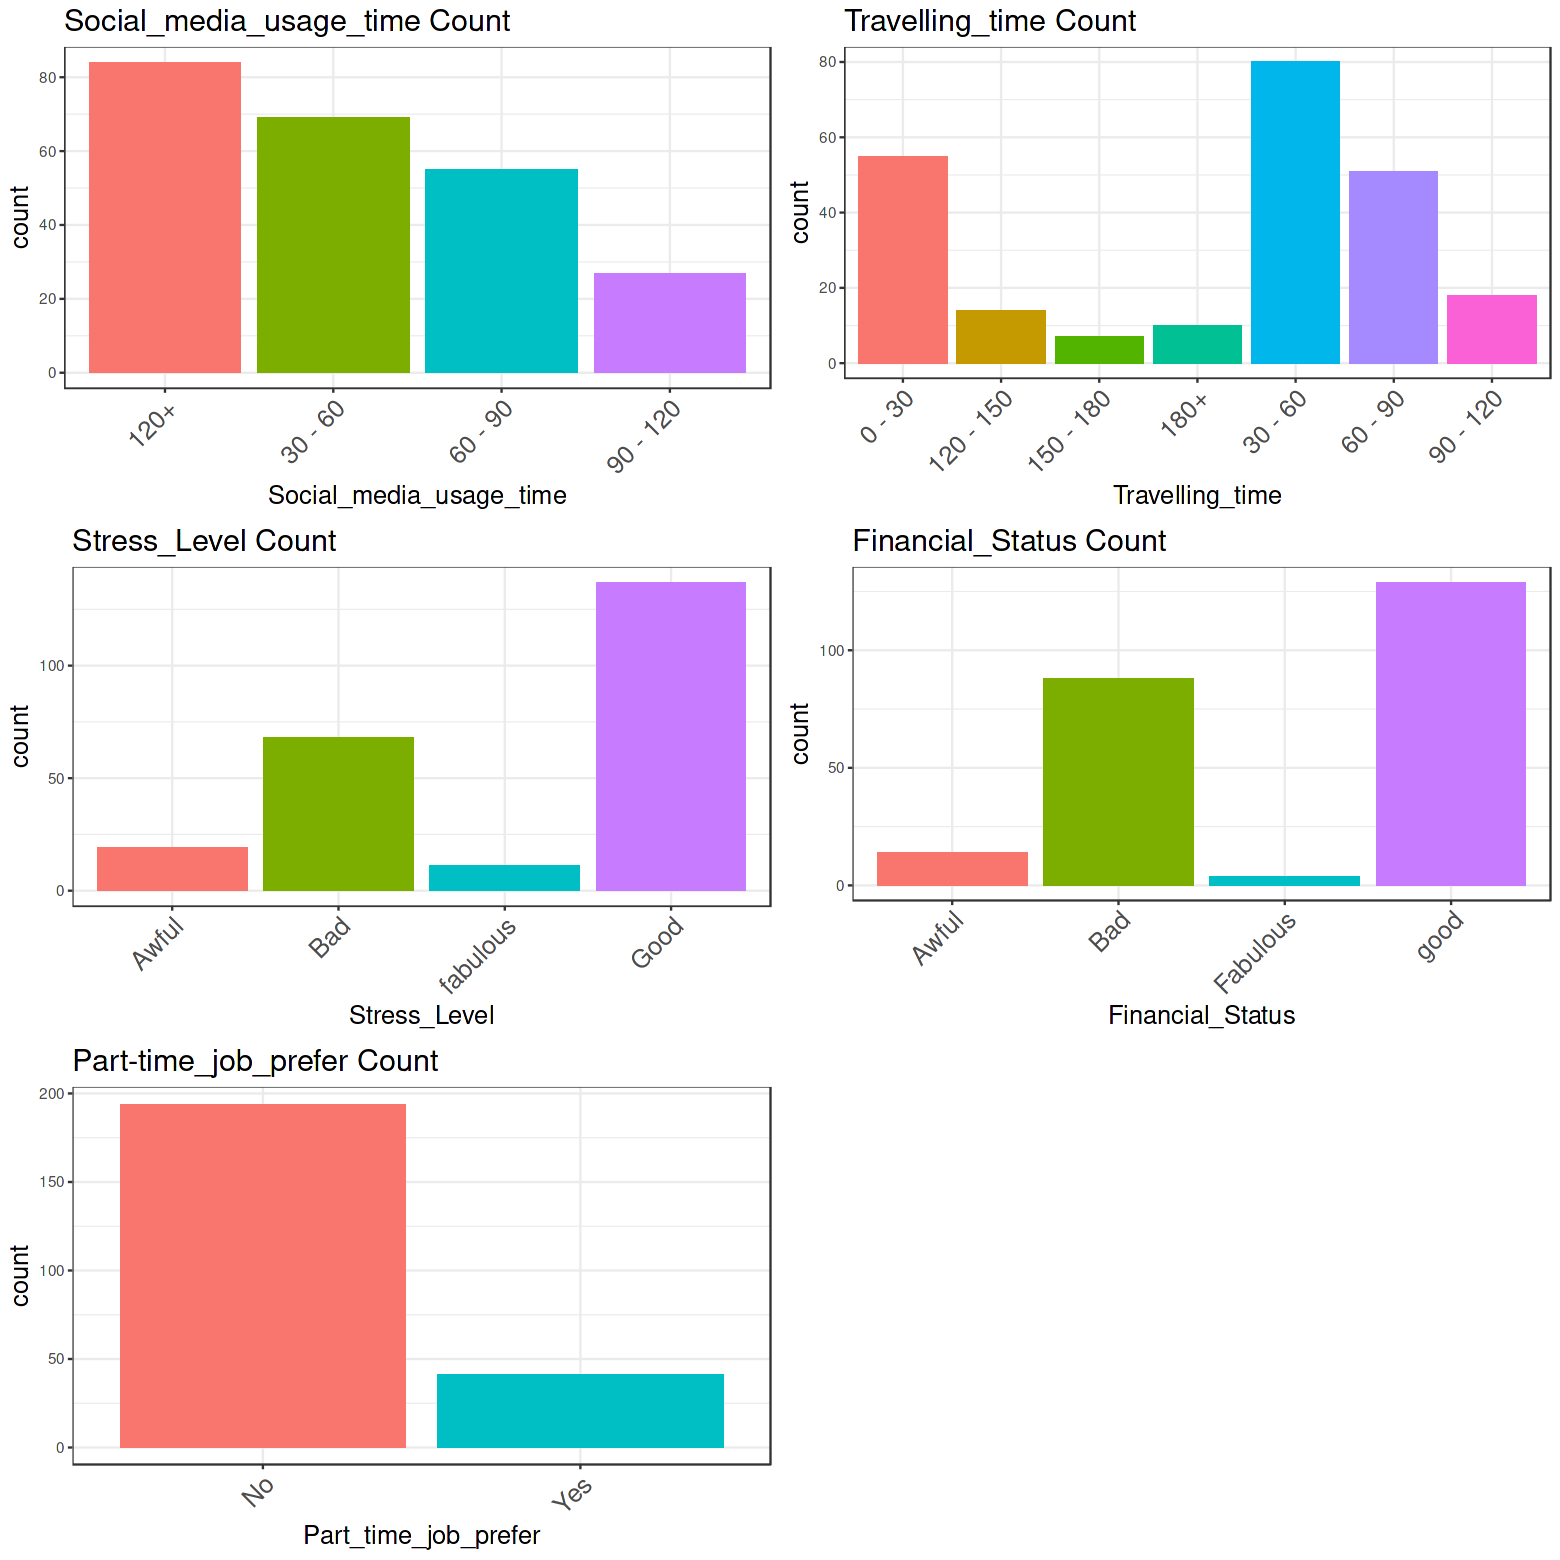

In [512]:
grid.arrange(p1,p2,p3,p4,p5 ,ncol = 2)

-------

**Average Scores by gender**

In [513]:
score_by_gender <- data %>% 
                    group_by(Gender) %>%
                    summarize(Avg_Mark_10th = mean(Mark_10th,na.rm=T),
                             Avg_Mark_12th = mean(Mark_12th,na.rm=T),
                             Avg_College_mark = mean(College_mark,na.rm=T))

In [514]:
score_by_gender

Gender,Avg_Mark_10th,Avg_Mark_12th,Avg_College_mark
<chr>,<dbl>,<dbl>,<dbl>
Female,78.97468,71.71519,76.87089
Male,75.77179,67.28737,67.51558


In [515]:
p1 <- ggplot(score_by_gender) + geom_col(aes(x= Gender , y= Avg_Mark_10th, fill = Gender)) +
            geom_text(aes(x=Gender , y= Avg_Mark_10th, label= round(Avg_Mark_10th,2), vjust=0)) +
            theme_bw() + ggtitle('Average Mark_10th Scores by gender') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )

p2 <- ggplot(score_by_gender) + geom_col(aes(x= Gender , y= Avg_Mark_12th, fill = Gender)) +
            geom_text(aes(x=Gender , y= Avg_Mark_12th, label= round(Avg_Mark_12th,2), vjust=0)) +
            theme_bw() + ggtitle('Average Mark_12th Scores by gender') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )

p3 <- ggplot(score_by_gender) + geom_col(aes(x= Gender , y= Avg_College_mark, fill = Gender)) +
            geom_text(aes(x=Gender , y= Avg_College_mark, label= round(Avg_College_mark,2), vjust=0)) +
            theme_bw() + ggtitle('Average College_mark Scores by gender') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )

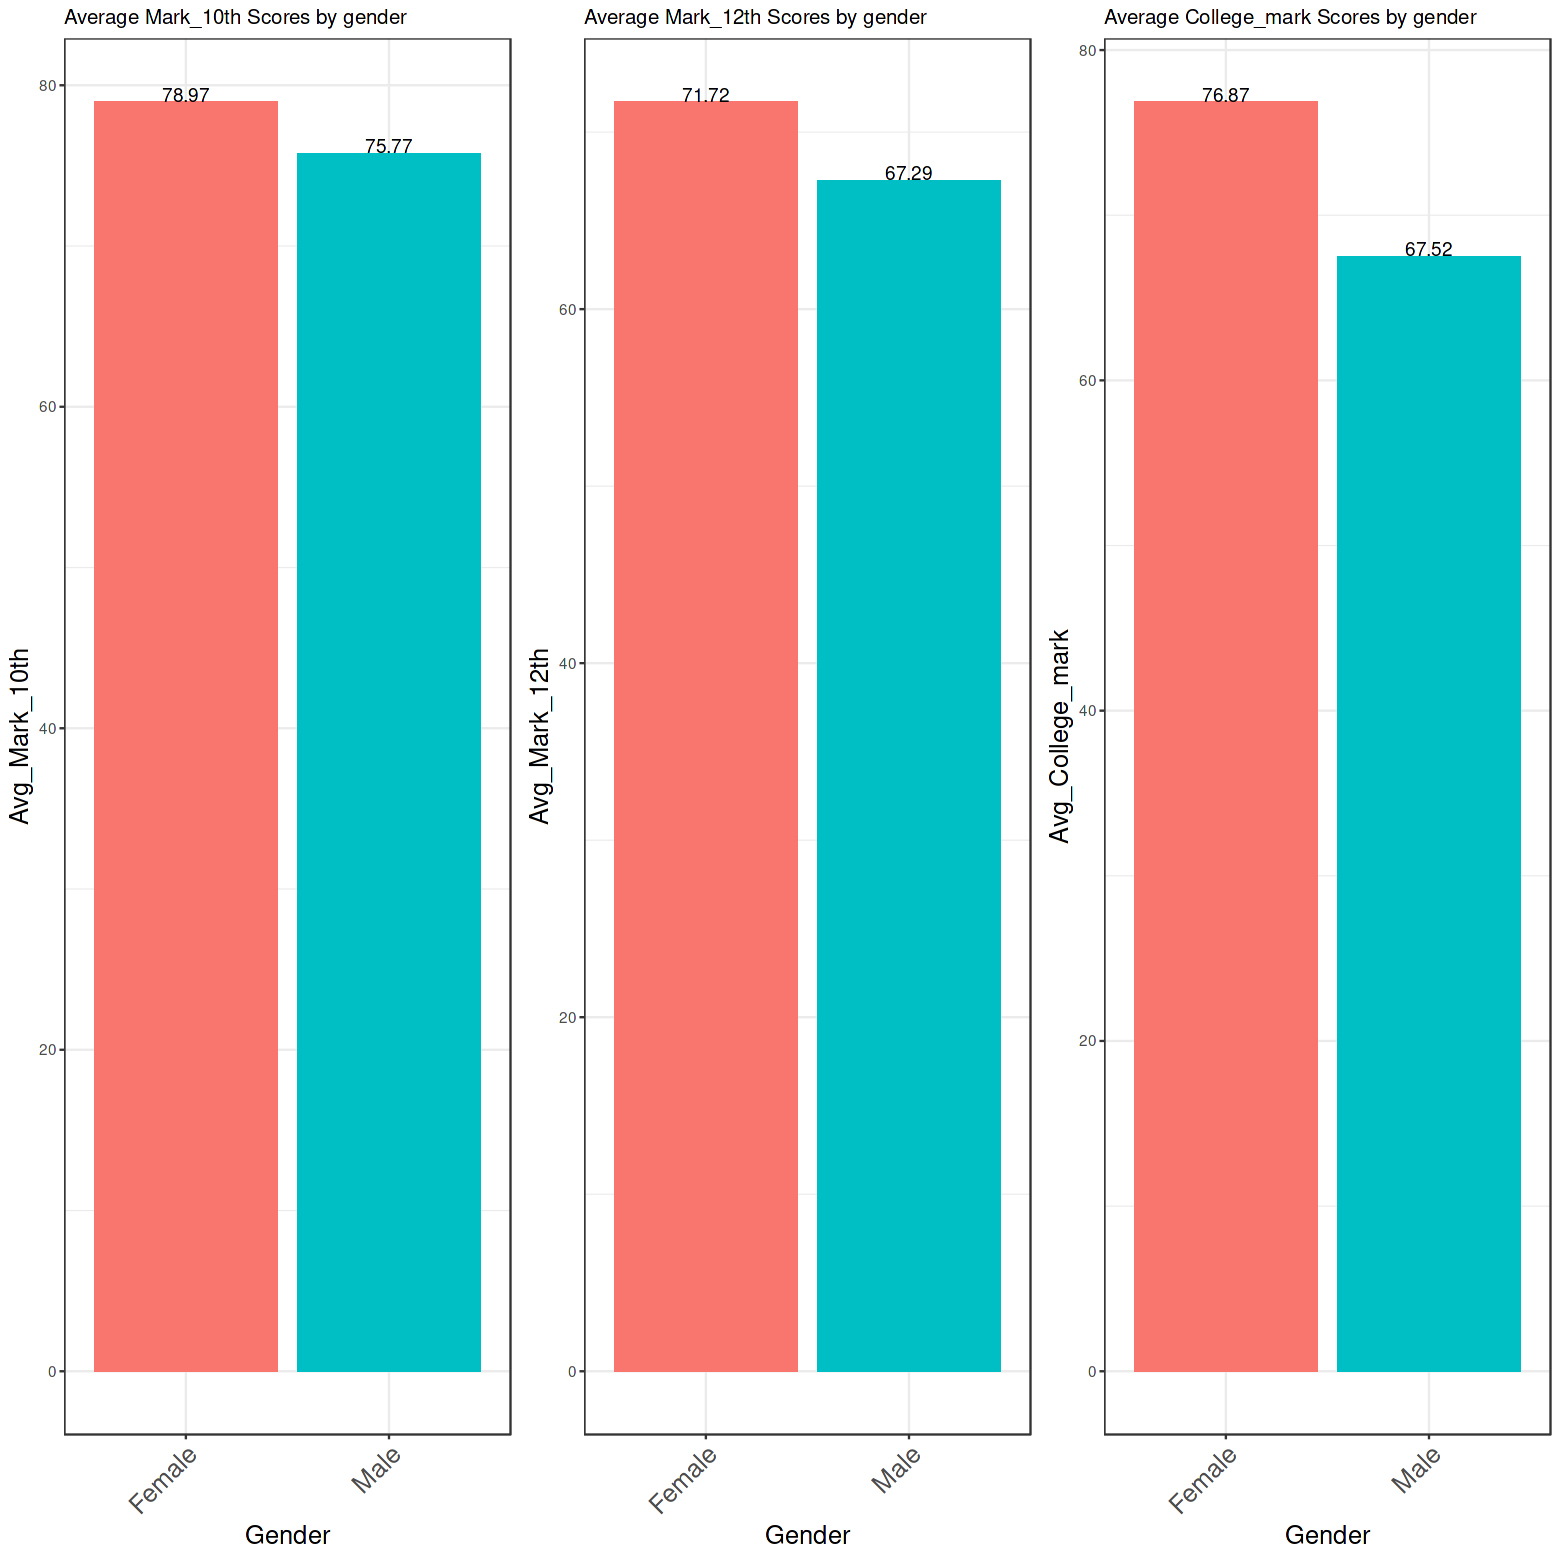

In [516]:
grid.arrange(p1,p2,p3 ,ncol = 3)

---------

**Average Scores by Strees_Level**

In [517]:
score_by_stress <- data %>% 
                    group_by(Stress_Level) %>%
                    summarize(Avg_Mark_10th = mean(Mark_10th,na.rm=T),
                             Avg_Mark_12th = mean(Mark_12th,na.rm=T),
                             Avg_College_mark = mean(College_mark,na.rm=T))

In [518]:
score_by_stress

Stress_Level,Avg_Mark_10th,Avg_Mark_12th,Avg_College_mark
<chr>,<dbl>,<dbl>,<dbl>
Awful,78.08421,68.42105,70.26316
Bad,76.00294,65.23088,68.75441
Good,77.70511,70.85861,71.53964
fabulous,69.27273,65.36364,72.18182


In [519]:
p1 <- ggplot(score_by_stress) + geom_col(aes(x= Stress_Level , y= Avg_Mark_10th, fill = Stress_Level)) +
            geom_text(aes(x=Stress_Level , y= Avg_Mark_10th, label= round(Avg_Mark_10th,2), vjust=0)) +
            theme_bw() + ggtitle('Average Mark_10th Scores by Stress_Level') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )

p2 <- ggplot(score_by_stress) + geom_col(aes(x= Stress_Level , y= Avg_Mark_12th, fill = Stress_Level)) +
            geom_text(aes(x=Stress_Level , y= Avg_Mark_12th, label= round(Avg_Mark_12th,2), vjust=0)) +
            theme_bw() + ggtitle('Average Mark_12th Scores by Stress_Level') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )

p3 <- ggplot(score_by_stress) + geom_col(aes(x= Stress_Level , y= Avg_College_mark, fill = Stress_Level)) +
            geom_text(aes(x=Stress_Level , y= Avg_College_mark, label= round(Avg_College_mark,2), vjust=0)) +
            theme_bw() + ggtitle('Average College_mark Scores by Stress_Level') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )
p4 <- ggplot(score_by_stress) + geom_col(aes(x=Stress_Level , y= Avg_College_mark, fill = Stress_Level)) +
            geom_text(aes(x=Stress_Level , y= Avg_College_mark, label= round(Avg_College_mark,2), vjust=0)) +
            theme_bw() + ggtitle('Average College_mark Scores by Stress_Level') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            )

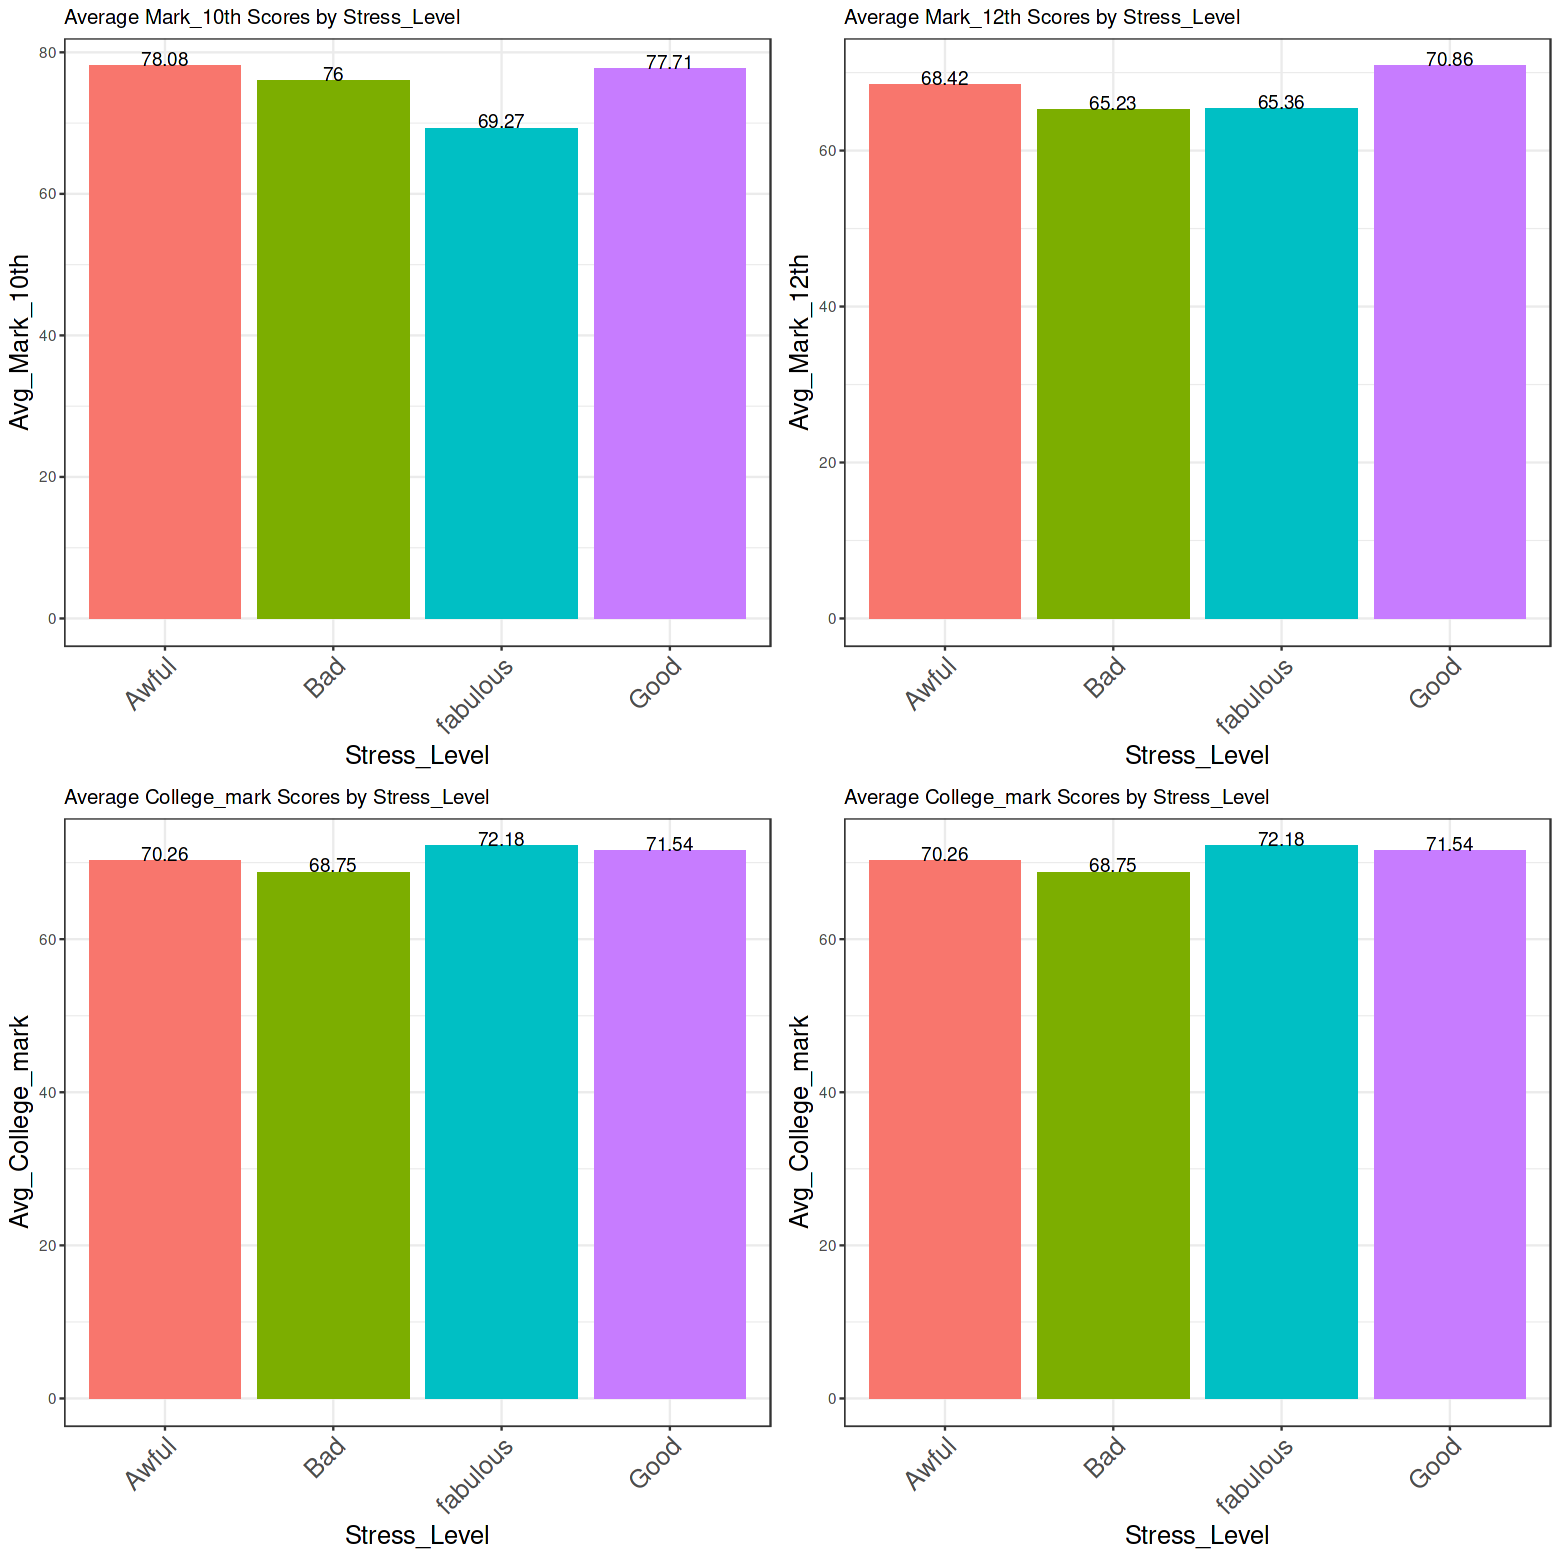

In [520]:
grid.arrange(p1,p2,p3,p4 ,ncol = 2)

-------

**Average College_mark Score by Social_media_usage_time**

In [521]:
score_by_smut <- data %>% 
                    group_by(Social_media_usage_time) %>%
                    summarize(Avg_College_mark = mean(College_mark,na.rm=T))

In [522]:
score_by_smut

Social_media_usage_time,Avg_College_mark
<chr>,<dbl>
120+,68.76738
30 - 60,71.93623
60 - 90,71.13273
90 - 120,72.32852


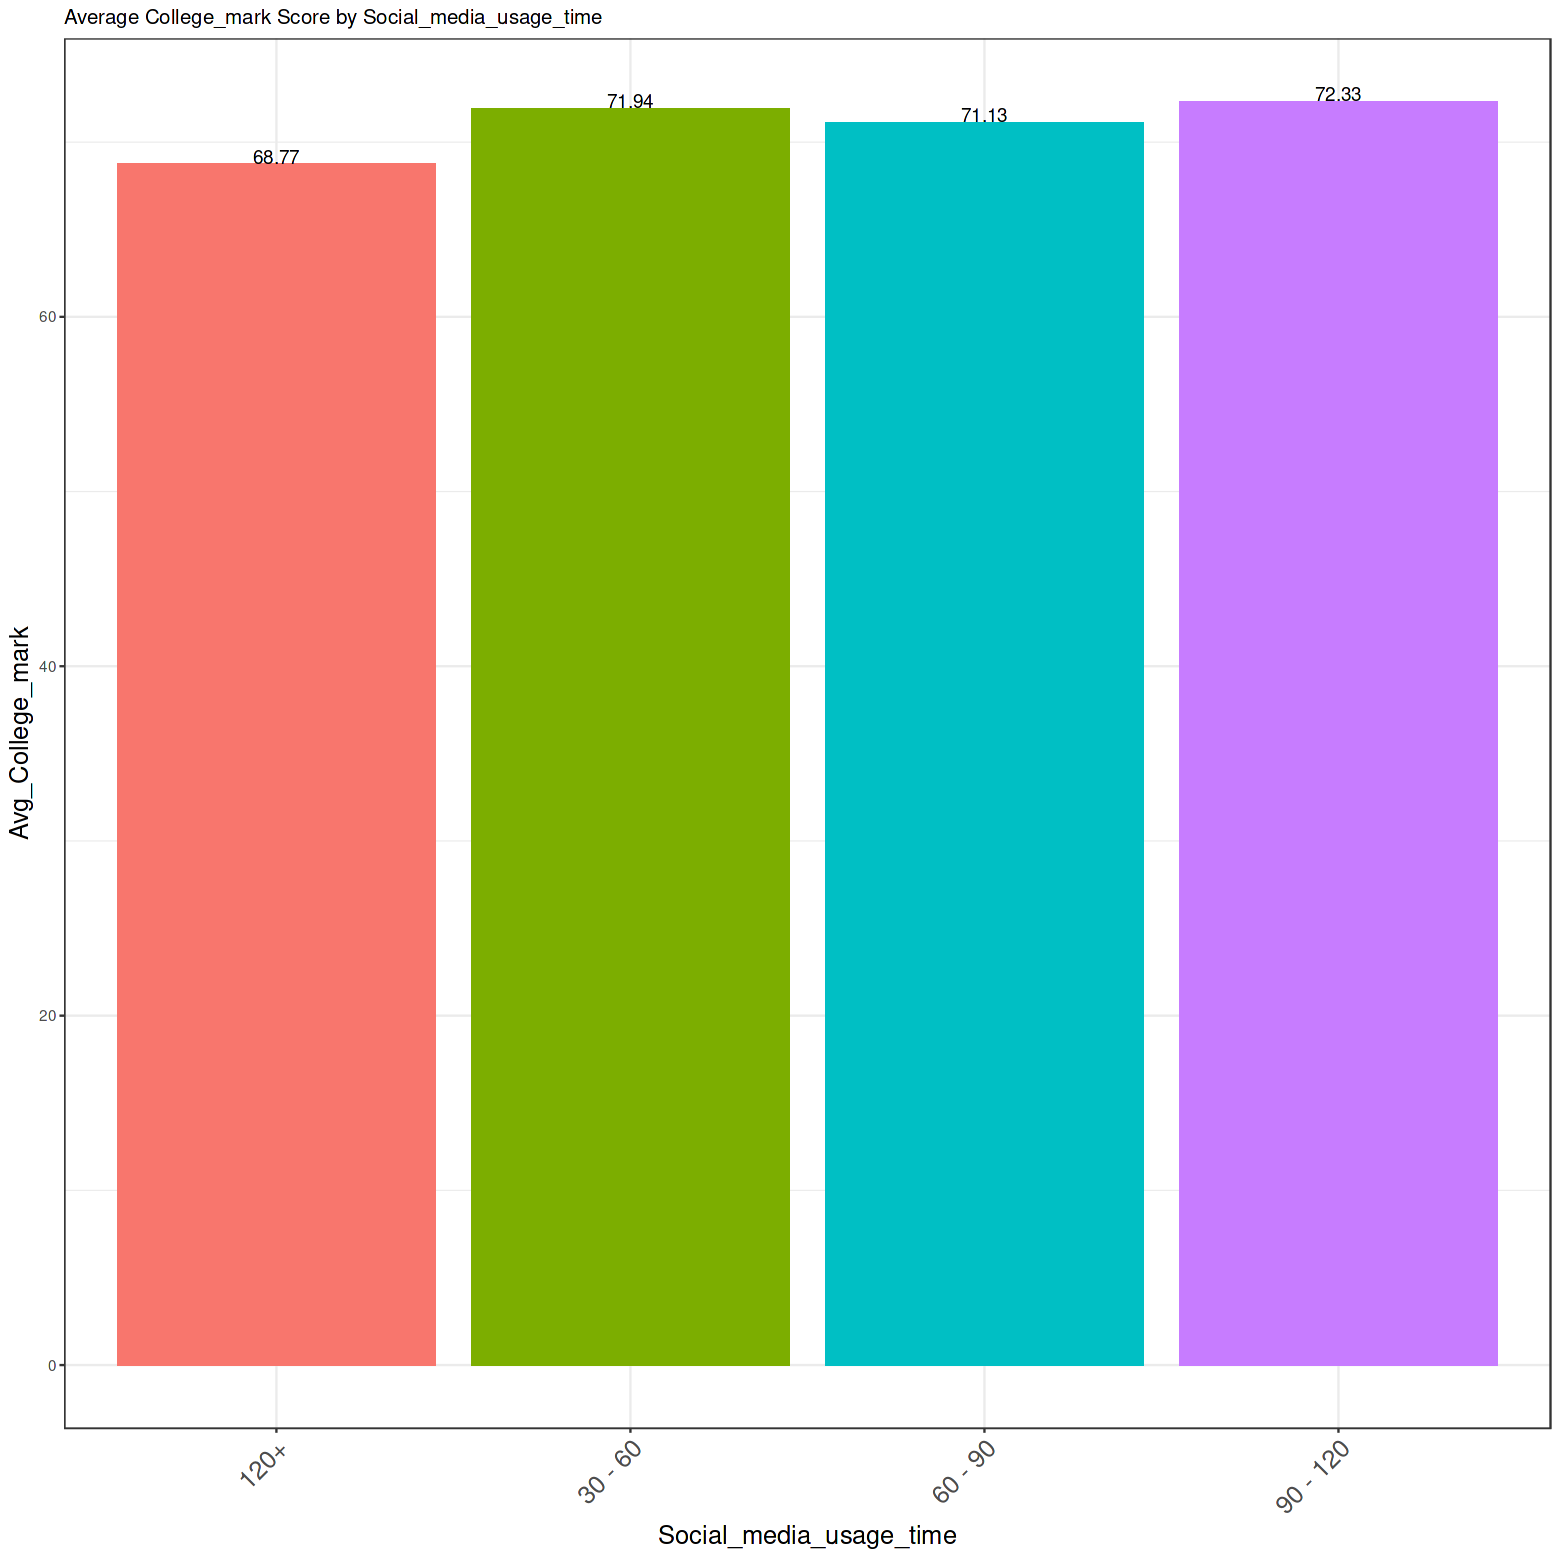

In [523]:
ggplot(score_by_smut) + geom_col(aes(x= Social_media_usage_time , y= Avg_College_mark, fill = Social_media_usage_time)) +
            geom_text(aes(x=Social_media_usage_time , y= Avg_College_mark, label= round(Avg_College_mark,2), vjust=0)) +
            theme_bw() + ggtitle('Average College_mark Score by Social_media_usage_time') +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15,angle = 45, hjust=1),
            title = element_text(size=10),
            legend.position = 'none'
            ) 

------

**Correlation**

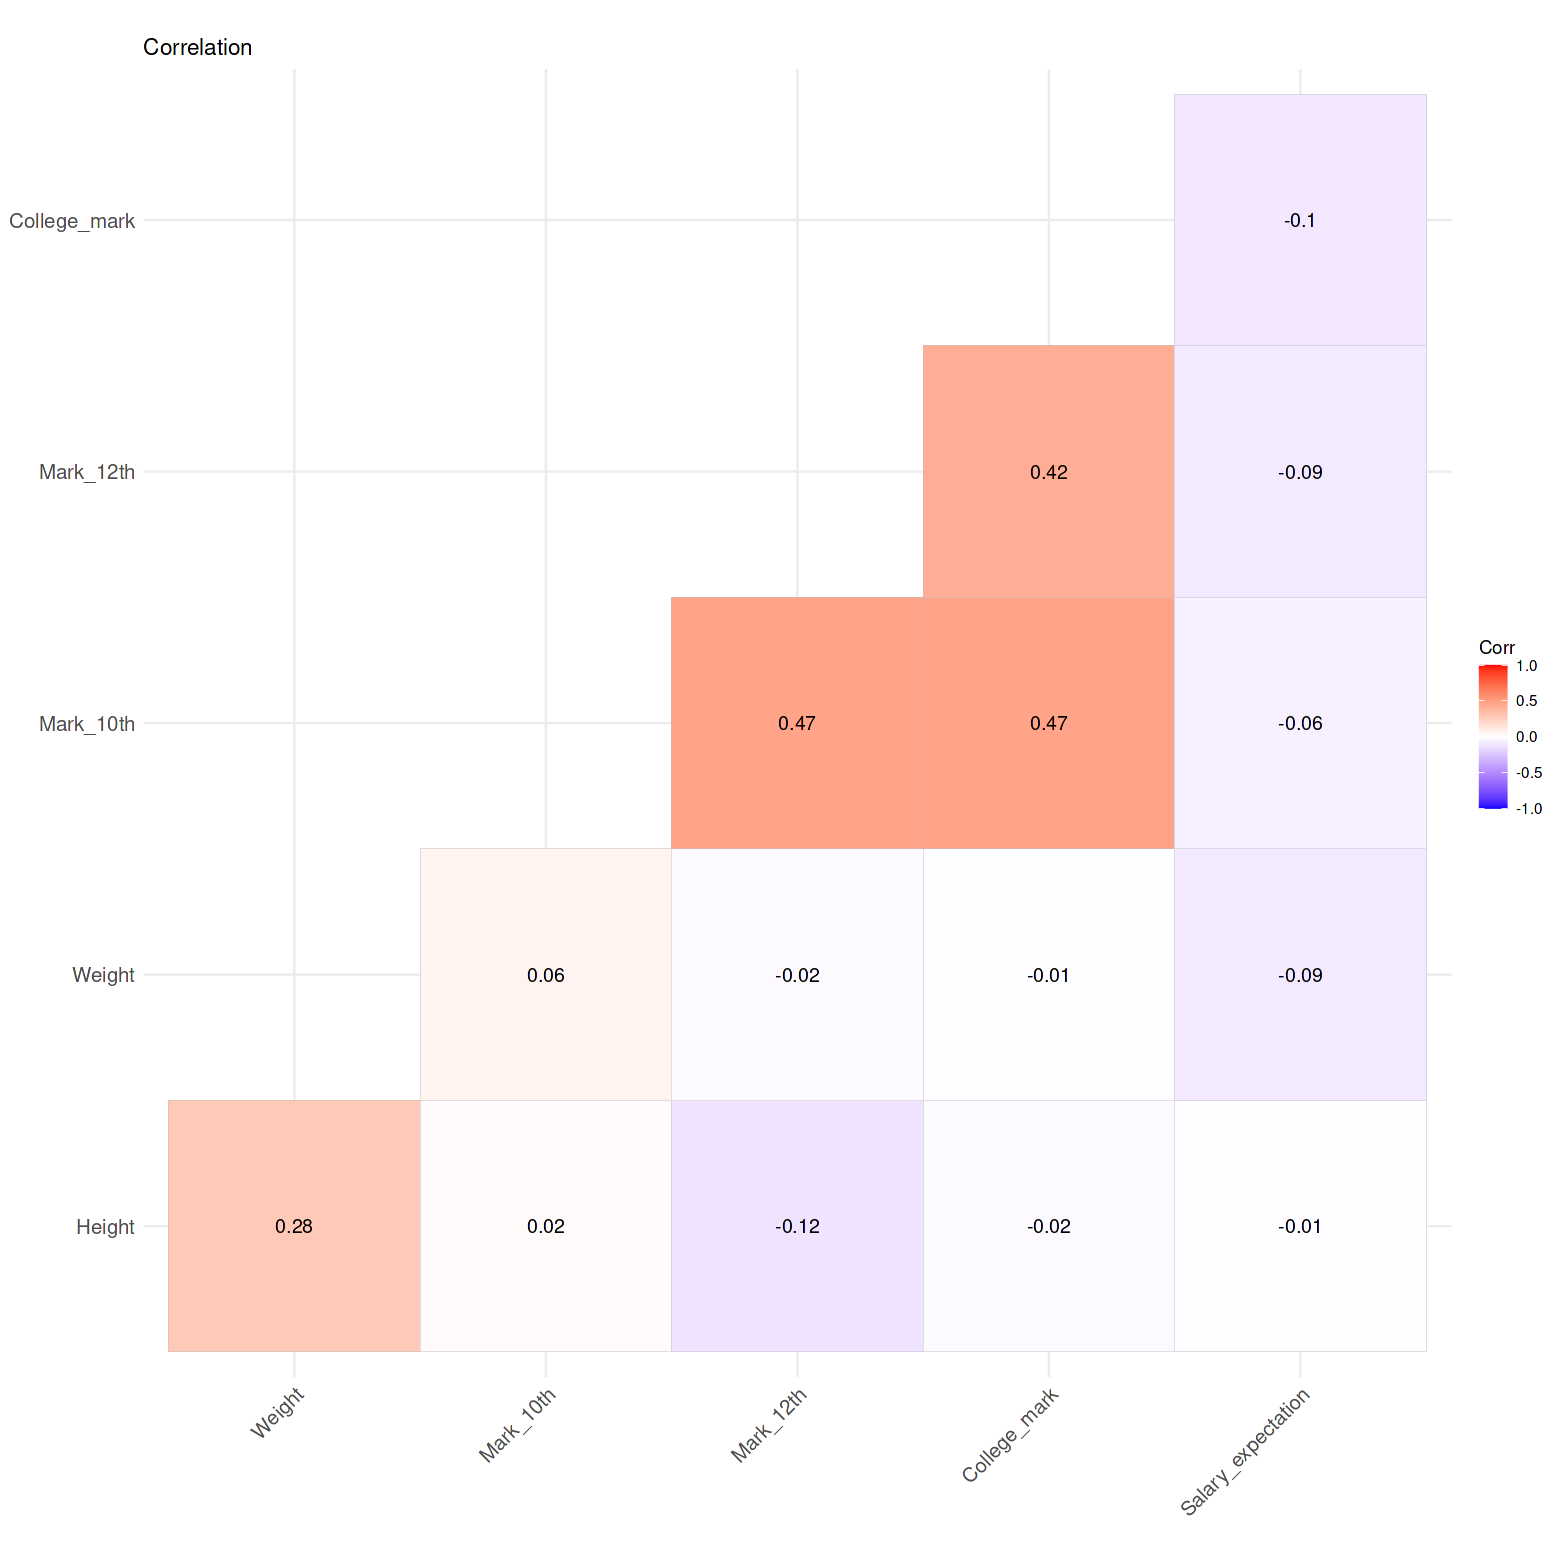

In [524]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

------------

# **4. Modeling**

In [588]:
library(mltools)
library(data.table)
library(caret)
library(randomForest)
library(xgboost)

**One Hot Encoding**

In [526]:
data$Stress_Level <- as.factor(data$Stress_Level)

#'Awful': 0, 'Bad': 1, 'Good': 2, 'fabulous': 3
data$Stress_Level <- ifelse(data$Stress_Level == 'Awful', '0',
                           ifelse(data$Stress_Level == 'Bad', '1',
                                 ifelse(data$Stress_Level == 'Good', '2','3')))

In [527]:
data$Certification <- as.factor(data$Certification)
data$Gender <- as.factor(data$Gender)
data$Department <- as.factor(data$Department)
data$Hobbies <- as.factor(data$Hobbies)
data$Daily_studing_time <- as.factor(data$Daily_studing_time)
data$Study_time_prefer <- as.factor(data$Study_time_prefer)
data$Prefer_degree <- as.factor(data$Prefer_degree)
data$Willingness_find_job <- as.factor(data$Willingness_find_job)
data$Social_media_usage_time <- as.factor(data$Social_media_usage_time)
data$Travelling_time <- as.factor(data$Travelling_time)
data$Financial_Status <- as.factor(data$Financial_Status )
data$Part_time_job_prefer <- as.factor(data$Part_time_job_prefer)

In [528]:
encoding_data <- one_hot(as.data.table(data))

In [533]:
encoding_data <- encoding_data[,-46]

**MinMaxScaler**

In [529]:
minmax <- function(x){
    return ((x-min(x))/(max(x)-min(x)))
}

In [535]:
encoding_data <- as.data.frame(lapply(encoding_data,minmax))

In [538]:
encoding_data$Stress_Level <- data$Stress_Level
encoding_data$Stress_Level <- as.factor(encoding_data$Stress_Level)

In [539]:
head(encoding_data)

,Certification_No,Certification_Yes,Gender_Female,Gender_Male,Department_B.com.Accounting.and.Finance,Department_B.com.ISM,Department_BCA,Department_Commerce,Height,Weight,⋯,Travelling_time_30...60,Travelling_time_60...90,Travelling_time_90...120,Financial_Status_Awful,Financial_Status_Bad,Financial_Status_Fabulous,Financial_Status_good,Part_time_job_prefer_No,Part_time_job_prefer_Yes,Stress_Level
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,0,1,0,0,1,0,0.5093333,0.4418605,⋯,1,0,0,0,1,0,0,1,0,1
2,1,0,1,0,0,0,1,0,0.4560000,0.2325581,⋯,0,0,0,0,1,0,0,1,0,1
3,0,1,0,1,0,0,1,0,0.8240000,0.6744186,⋯,1,0,0,0,1,0,0,1,0,0
4,0,1,1,0,0,0,1,0,0.7600000,0.0000000,⋯,0,0,0,0,0,0,1,1,0,1
5,1,0,0,1,0,0,1,0,0.8826667,0.3953488,⋯,1,0,0,0,0,0,1,1,0,2
6,0,1,1,0,0,0,1,0,0.7173333,0.1511628,⋯,0,0,0,0,0,0,1,1,0,1


In [590]:
idx <- sample(nrow(encoding_data), 0.7 * nrow(encoding_data))
train <- encoding_data[idx,]
test <- encoding_data[-idx,]

**RandomForest**

In [611]:
RF <-  randomForest(Stress_Level ~. , data = train, ntree=300, type = "class")

In [612]:
print(RF)


Call:
 randomForest(formula = Stress_Level ~ ., data = train, ntree = 300,      type = "class") 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 7

        OOB estimate of  error rate: 40.85%
Confusion matrix:
  0  1  2 3 class.error
0 0  2 10 0   1.0000000
1 0 10 36 0   0.7826087
2 0 10 87 0   0.1030928
3 0  3  6 0   1.0000000


In [613]:
pred_rf <- predict(RF,test,type = "class")

In [614]:
confusionMatrix(factor(pred_rf), reference = test$Stress_Level)

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(factor(pred_rf), reference = test$Stress_Level):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0  0  0  0  0
         1  1  5  2  0
         2  6 17 38  1
         3  0  0  0  1

Overall Statistics
                                          
               Accuracy : 0.6197          
                 95% CI : (0.4967, 0.7324)
    No Information Rate : 0.5634          
    P-Value [Acc > NIR] : 0.2017          
                                          
                  Kappa : 0.1956          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity           0.00000  0.22727   0.9500  0.50000
Specificity           1.00000  0.93878   0.2258  1.00000
Pos Pred Value            NaN  0.62500   0.6129  1.00000
Neg Pred Value        0.90141  0.73016   0.7778  0.98571
Prevalence            0.09859  0.30986   0.5634  0.02817
Detection Rate        0.00000  0.07042   0.5352  0.01408
Det

----

**Please leave your advice in the comments. Thank you**